# HepG2

In [1]:
import pandas as pd
import numpy as np
import math
import re

## Load the file generated by salmon quant (converted to .xlsx)

In [2]:
hep = pd.read_excel("hepg2_quant.xlsx") 
hep

,Name,Length,EffectiveLength,TPM,NumReads
0,ENST00000456328.2|ENSG00000223972.5|OTTHUMG000...,1657,1407.000,0.000000,0.000
1,ENST00000450305.2|ENSG00000223972.5|OTTHUMG000...,632,382.000,0.000000,0.000
2,ENST00000488147.1|ENSG00000227232.5|OTTHUMG000...,1351,1101.000,0.000000,0.000
3,ENST00000619216.1|ENSG00000278267.1|-|-|MIR685...,68,2.848,0.000000,0.000
4,ENST00000473358.1|ENSG00000243485.5|OTTHUMG000...,712,462.000,0.000000,0.000
...,...,...,...,...,...
227457,ENST00000361681.2|ENSG00000198695.2|-|-|MT-ND6...,525,275.000,623.401740,198.590
227458,ENST00000387459.1|ENSG00000210194.1|-|-|MT-TE-...,69,2.865,1506.336336,5.000
227459,ENST00000361789.2|ENSG00000198727.2|-|-|MT-CYB...,1141,891.000,2991.829426,3087.958
227460,ENST00000387460.2|ENSG00000210195.2|-|-|MT-TT-...,66,2.815,1840.219355,6.000


Modify the 'Name' column and remove the exessive columns

In [3]:
hep[['ENST','ENSG', 'OTTHUMG', 'OTTHUMT', 'GeneTranscriptID', 'GeneID', 'Length_1','Type', 'ToRemove']] = hep.Name.str.split("|",expand = True,)
hep = hep.drop(['Name','ENST','ENSG','OTTHUMG','OTTHUMT','Length_1','ToRemove'],axis = 1)
hep = hep[['GeneTranscriptID','GeneID','Length','Type','EffectiveLength','TPM', 'NumReads']]
hep

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.000000,0.000
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.000000,0.000
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.000000,0.000
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.000000,0.000
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.000000,0.000
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,623.401740,198.590
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,1506.336336,5.000
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,2991.829426,3087.958
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1840.219355,6.000


### Search for non-zero ranscripts

In [4]:
hep.loc[hep['TPM'] != 0] # Non-zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
20,CICP27-201,CICP27,3812,processed_pseudogene,3562.000,0.242354,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,2440.800549,344.944
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,706.086521,649.434
95,MTCO1P12-201,MTCO1P12,1543,unprocessed_pseudogene,1293.000,1426.448994,2136.543
97,MTCO2P12-201,MTCO2P12,682,unprocessed_pseudogene,432.000,6838.355280,3422.096
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,623.401740,198.590
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,1506.336336,5.000
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,2991.829426,3087.958
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1840.219355,6.000


In [5]:
hep.loc[hep['TPM'] == 0]# Zero transcripts

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
0,DDX11L1-202,DDX11L1,1657,lncRNA,1407.000,0.0,0.0
1,DDX11L1-201,DDX11L1,632,transcribed_unprocessed_pseudogene,382.000,0.0,0.0
2,WASH7P-201,WASH7P,1351,unprocessed_pseudogene,1101.000,0.0,0.0
3,MIR6859-1-201,MIR6859-1,68,miRNA,2.848,0.0,0.0
4,MIR1302-2HG-202,MIR1302-2HG,712,lncRNA,462.000,0.0,0.0
...,...,...,...,...,...,...,...
227442,MT-TD-201,MT-TD,68,Mt_tRNA,2.848,0.0,0.0
227448,MT-TG-201,MT-TG,68,Mt_tRNA,2.848,0.0,0.0
227450,MT-TR-201,MT-TR,65,Mt_tRNA,2.798,0.0,0.0
227453,MT-TH-201,MT-TH,69,Mt_tRNA,2.865,0.0,0.0


In [6]:
hep.describe() # satatisctis for all the transcripts

,Length,EffectiveLength,TPM,NumReads
count,227462.000000,227462.000000,227462.000000,227462.000000
mean,1572.205001,1328.013905,4.396339,2.645277
std,1880.949598,1876.647383,173.121027,49.434398
min,8.000000,1.722000,0.000000,0.000000
25%,564.000000,314.000000,0.000000,0.000000
50%,881.000000,631.000000,0.000000,0.000000
75%,1990.000000,1740.000000,0.000000,0.000000
max,205012.000000,204762.000000,33525.766589,9307.576000


In [7]:
hep.loc[hep['TPM'] != 0].describe() # non-zero transcripts only

,Length,EffectiveLength,TPM,NumReads
count,28386.000000,28386.000000,28386.000000,28386.000000
mean,2771.962200,2522.374368,35.228634,21.197069
std,2716.257089,2715.866134,488.961338,138.526612
min,57.000000,2.672000,0.000003,0.000000
25%,1100.250000,850.250000,0.890265,2.000000
50%,2114.000000,1864.000000,2.405429,4.596500
75%,3652.750000,3402.750000,7.138527,12.474000
max,205012.000000,204762.000000,33525.766589,9307.576000


### Save the non-zero transcripts for futher work

In [8]:
hep = hep[hep.TPM != 0]
hep

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
20,CICP27-201,CICP27,3812,processed_pseudogene,3562.000,0.242354,1.000
93,MTND1P23-201,MTND1P23,372,unprocessed_pseudogene,122.000,2440.800549,344.944
94,MTND2P28-201,MTND2P28,1044,unprocessed_pseudogene,794.000,706.086521,649.434
95,MTCO1P12-201,MTCO1P12,1543,unprocessed_pseudogene,1293.000,1426.448994,2136.543
97,MTCO2P12-201,MTCO2P12,682,unprocessed_pseudogene,432.000,6838.355280,3422.096
...,...,...,...,...,...,...,...
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,623.401740,198.590
227458,MT-TE-201,MT-TE,69,Mt_tRNA,2.865,1506.336336,5.000
227459,MT-CYB-201,MT-CYB,1141,protein_coding,891.000,2991.829426,3087.958
227460,MT-TT-201,MT-TT,66,Mt_tRNA,2.815,1840.219355,6.000


### Sort the transcripts by TPM to get the top-expressed transcripts

In [9]:
hep.sort_values(by = ['TPM'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
227437,MT-TN-201,MT-TN,73,Mt_tRNA,2.935,33525.766589,114.000
104780,AL161787.1-201,AL161787.1,174,processed_pseudogene,6.553,32627.989123,247.691
227439,MT-TY-201,MT-TY,66,Mt_tRNA,2.815,28450.935143,92.768
227449,MT-ND3-201,MT-ND3,346,protein_coding,96.006,23882.171039,2656.000
98,MTATP8P1-201,MTATP8P1,207,unprocessed_pseudogene,9.766,19522.148281,220.851
...,...,...,...,...,...,...,...
215557,AC245452.1-201,AC245452.1,37852,lncRNA,37602.000,0.028778,1.253
222872,TSIX-201,TSIX,37027,lncRNA,36777.000,0.023473,1.000
117592,KCNQ1OT1-201,KCNQ1OT1,91667,lncRNA,91417.000,0.021499,2.277
216674,AC003681.1-201,AC003681.1,49287,lncRNA,49037.000,0.018570,1.055


### Sort the transcripts by number of reads mapped

In [10]:
hep.sort_values(by = ['NumReads'],  ascending = False) 

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
203145,FTL-201,FTL,871,protein_coding,621.000,12938.627363,9307.576
227428,MT-RNR2-201,MT-RNR2,1559,Mt_rRNA,1309.000,6071.173035,9205.959
76619,EEF1A1-207,EEF1A1,1802,retained_intron,1552.000,4005.606509,7201.398
227447,MT-CO3-201,MT-CO3,784,protein_coding,534.000,8680.388648,5369.542
227443,MT-CO2-201,MT-CO2,684,protein_coding,434.000,8546.576477,4296.736
...,...,...,...,...,...,...,...
11194,U1.27-201,U1,164,snRNA,5.913,18.249861,0.125
2265,RNU1-2-201,RNU1-2,164,snRNA,5.913,18.249861,0.125
2235,RNU1-4-201,RNU1-4,164,snRNA,5.913,18.249861,0.125
149285,RNU1-27P-201,RNU1-27P,164,snRNA,5.913,18.249861,0.125


### The quantitative profile of transcripts biotypes

In [11]:
hep['Type'].unique()

array(['processed_pseudogene', 'unprocessed_pseudogene', 'lncRNA',
       'protein_coding', 'retained_intron', 'nonsense_mediated_decay',
       'snRNA', 'snoRNA', 'TEC', 'transcribed_unprocessed_pseudogene',
       'transcribed_processed_pseudogene', 'scRNA', 'miRNA', 'misc_RNA',
       'polymorphic_pseudogene', 'pseudogene', 'non_stop_decay', 'scaRNA',
       'rRNA', 'transcribed_unitary_pseudogene', 'Mt_tRNA', 'Mt_rRNA'],
      dtype=object)

In [12]:
for i in hep['Type'].unique():
    print(i,':', len(hep[hep['Type'].str.contains(i)]))

processed_pseudogene : 440
unprocessed_pseudogene : 66
lncRNA : 3911
protein_coding : 18918
retained_intron : 2779
nonsense_mediated_decay : 2196
snRNA : 12
snoRNA : 7
TEC : 74
transcribed_unprocessed_pseudogene : 26
transcribed_processed_pseudogene : 21
scRNA : 1
miRNA : 9
misc_RNA : 8
polymorphic_pseudogene : 2
pseudogene : 445
non_stop_decay : 8
scaRNA : 1
rRNA : 4
transcribed_unitary_pseudogene : 1
Mt_tRNA : 13
Mt_rRNA : 2


In [13]:
# RNA
len(hep[hep['Type'].str.contains(r'RNA')])

3966

In [14]:
# Pseudogenes
len(hep[hep['Type'].str.contains(r'pseudogene')]) + \
len(hep[hep['Type'].str.contains(r'transcribed_unprocessed_pseudogene')]) + \
len(hep[hep['Type'].str.contains(r'transcribed_processed_pseudogene')]) + \
len(hep[hep['Type'].str.contains(r'processed_pseudogene')]) + \
len(hep[hep['Type'].str.contains(r'unprocessed_pseudogene')]) + \
len(hep[hep['Type'].str.contains(r'polymorphic_pseudogene')]) + \
len(hep[hep['Type'].str.contains(r'transcribed_unitary_pseudogene')])


1001

## Visualization

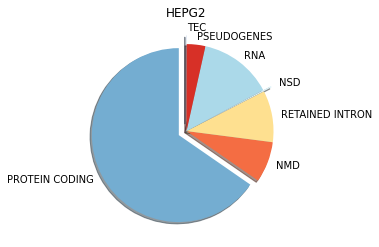

In [15]:
import matplotlib.pyplot as plt

labels = ['PROTEIN CODING', 
          'NMD',
          'RETAINED INTRON',
          'NSD',
          'RNA', 
          'PSEUDOGENES', 
          'TEC']

sizes = [18918, 2196, 2779, 74, 3966, 1001, 8]

explode = (0.1, 0, 0, 0.1, 0, 0, 0.1)  

colors =['#74add1', '#f46d43', '#fee090', '#e0f3f8', '#abd9e9','#d73027' , '#4575b4']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels,
        shadow = True, colors = colors, startangle = 90)
ax1.set_title("HEPG2")

# plt.savefig('HepG2_Sum.png')

plt.show()

### Retrieve protein_coding transcripts 

In [16]:
hep_protein = hep[hep['Type'].str.contains(r'protein_coding')]
hep_protein
# protein_coding = 18918

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
194,SAMD11-216,SAMD11,1874,protein_coding,1624.000,2.108517,3.967
202,NOC2L-201,NOC2L,2757,protein_coding,2507.000,1.176138,3.416
208,KLHL17-201,KLHL17,2567,protein_coding,2317.000,1.117734,3.000
209,KLHL17-205,KLHL17,1950,protein_coding,1700.000,2.539009,5.000
213,PLEKHN1-203,PLEKHN1,3176,protein_coding,2926.000,0.436338,1.479
...,...,...,...,...,...,...,...
227451,MT-ND4L-201,MT-ND4L,297,protein_coding,48.689,1292.745787,72.912
227452,MT-ND4-201,MT-ND4,1378,protein_coding,1128.000,2353.920111,3075.797
227456,MT-ND5-201,MT-ND5,1812,protein_coding,1562.000,244.504629,442.410
227457,MT-ND6-201,MT-ND6,525,protein_coding,275.000,623.401740,198.590


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [17]:
spl_var_num = hep_protein.groupby('GeneID', as_index = False).count() 
spl_var_num

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,A1CF,2,2,2,2,2,2
1,A2M,2,2,2,2,2,2
2,A4GALT,1,1,1,1,1,1
3,AAAS,2,2,2,2,2,2
4,AACS,1,1,1,1,1,1
...,...,...,...,...,...,...,...
10780,ZWINT,3,3,3,3,3,3
10781,ZXDB,1,1,1,1,1,1
10782,ZYG11B,2,2,2,2,2,2
10783,ZYX,3,3,3,3,3,3


## Summing the total TPM for each gene

In [18]:
total_tpm = hep_protein.groupby('GeneID', as_index = False).sum()
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumReads
0,A1CF,11611,11111.0,9.084799,28.000
1,A2M,5467,4967.0,277.212266,1458.743
2,A4GALT,1956,1706.0,0.506016,1.000
3,AAAS,2812,2312.0,10.385680,16.344
4,AACS,3256,3006.0,2.545470,8.864
...,...,...,...,...,...
10780,ZWINT,5164,4414.0,6.160817,10.278
10781,ZXDB,5894,5644.0,1.376571,9.000
10782,ZYG11B,10437,9937.0,0.641081,3.000
10783,ZYX,6401,5651.0,52.080858,110.012


In [19]:
total_tpm.insert(4, "NumSplVar", spl_var_num['Length'], True)

In [20]:
total_tpm

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,A1CF,11611,11111.0,9.084799,2,28.000
1,A2M,5467,4967.0,277.212266,2,1458.743
2,A4GALT,1956,1706.0,0.506016,1,1.000
3,AAAS,2812,2312.0,10.385680,2,16.344
4,AACS,3256,3006.0,2.545470,1,8.864
...,...,...,...,...,...,...
10780,ZWINT,5164,4414.0,6.160817,3,10.278
10781,ZXDB,5894,5644.0,1.376571,1,9.000
10782,ZYG11B,10437,9937.0,0.641081,2,3.000
10783,ZYX,6401,5651.0,52.080858,3,110.012


## There is 10785 protein coding genes in HepG2 sample (18918 transcripts)

In [21]:
for i in total_tpm['NumSplVar'].unique():
    print('Number of genes having',i,'isoforms (splice variants) is :', len(total_tpm[(total_tpm['NumSplVar'] == i)]))

Number of genes having 2 isoforms (splice variants) is : 3750
Number of genes having 1 isoforms (splice variants) is : 5272
Number of genes having 3 isoforms (splice variants) is : 1221
Number of genes having 4 isoforms (splice variants) is : 349
Number of genes having 6 isoforms (splice variants) is : 43
Number of genes having 7 isoforms (splice variants) is : 16
Number of genes having 8 isoforms (splice variants) is : 10
Number of genes having 5 isoforms (splice variants) is : 121
Number of genes having 14 isoforms (splice variants) is : 1
Number of genes having 9 isoforms (splice variants) is : 2


Text(0.5, 0.98, 'HEPG2 PROTEIN_CODING')

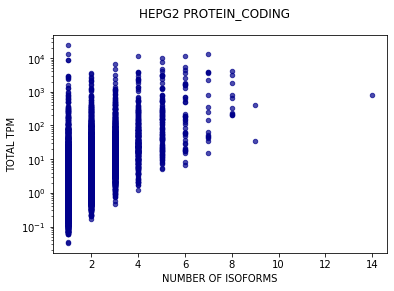

In [22]:
total_tpm.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = "darkblue")
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('HEPG2 PROTEIN_CODING')
#plt.savefig('HepG2_SplVar.png')

# Cytochrome P450

In [23]:
hep_cyp = hep_protein[hep_protein['GeneID'].str.contains(r'CYP')]
hep_cyp

,GeneTranscriptID,GeneID,Length,Type,EffectiveLength,TPM,NumReads
23518,ACYP2-209,ACYP2,1262,protein_coding,1012.0,3.573817,4.190
23519,ACYP2-203,ACYP2,1913,protein_coding,1663.0,1.076691,2.074
23520,ACYP2-201,ACYP2,789,protein_coding,539.0,1.976123,1.234
33251,CYP20A1-203,CYP20A1,1812,protein_coding,1562.0,3.868657,7.000
34271,CYP27A1-201,CYP27A1,1895,protein_coding,1645.0,6.401873,12.199
39551,CYP8B1-201,CYP8B1,3688,protein_coding,3438.0,0.251095,1.000
81474,CYP2W1-201,CYP2W1,2322,protein_coding,2072.0,2.083164,5.000
81475,CYP2W1-202,CYP2W1,2361,protein_coding,2111.0,4.920306,12.032
86834,CYP51A1-201,CYP51A1,3155,protein_coding,2905.0,0.594329,2.000
87574,CYP3A5-201,CYP3A5,1720,protein_coding,1470.0,0.587254,1.000


## Count the number of transcript isoforms (splice variant) in a single gene and a number of protein coding genes

In [24]:
cyp_spl = hep_cyp.groupby('GeneID', as_index=False).count() 
cyp_spl

,GeneID,GeneTranscriptID,Length,Type,EffectiveLength,TPM,NumReads
0,ACYP1,1,1,1,1,1,1
1,ACYP2,3,3,3,3,3,3
2,CYP19A1,1,1,1,1,1,1
3,CYP1A1,2,2,2,2,2,2
4,CYP20A1,1,1,1,1,1,1
5,CYP24A1,3,3,3,3,3,3
6,CYP27A1,1,1,1,1,1,1
7,CYP27B1,1,1,1,1,1,1
8,CYP2S1,2,2,2,2,2,2
9,CYP2W1,2,2,2,2,2,2


In [25]:
total_tpm_cyp = hep_cyp.groupby('GeneID', as_index=False).sum() # summing TPM on all splice varinats of a single gene
total_tpm_cyp   

,GeneID,Length,EffectiveLength,TPM,NumReads
0,ACYP1,789,539.0,14.414413,9.000
1,ACYP2,3964,3214.0,6.626631,7.498
2,CYP19A1,4403,4153.0,1.039325,5.000
3,CYP1A1,4923,4423.0,4.348322,11.000
4,CYP20A1,1812,1562.0,3.868657,7.000
5,CYP24A1,6943,6193.0,19.120730,57.144
6,CYP27A1,1895,1645.0,6.401873,12.199
7,CYP27B1,2372,2122.0,0.406816,1.000
8,CYP2S1,3192,2692.0,4.077868,5.000
9,CYP2W1,4683,4183.0,7.003470,17.032


In [26]:
total_tpm_cyp.insert(4, "NumSplVar", cyp_spl['Length'], True)

In [27]:
total_tpm_cyp

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
0,ACYP1,789,539.0,14.414413,1,9.000
1,ACYP2,3964,3214.0,6.626631,3,7.498
2,CYP19A1,4403,4153.0,1.039325,1,5.000
3,CYP1A1,4923,4423.0,4.348322,2,11.000
4,CYP20A1,1812,1562.0,3.868657,1,7.000
5,CYP24A1,6943,6193.0,19.120730,3,57.144
6,CYP27A1,1895,1645.0,6.401873,1,12.199
7,CYP27B1,2372,2122.0,0.406816,1,1.000
8,CYP2S1,3192,2692.0,4.077868,2,5.000
9,CYP2W1,4683,4183.0,7.003470,2,17.032


In [28]:
total_tpm_cyp = total_tpm_cyp.iloc[2:] # Drop non-CYP

In [29]:
total_tpm_cyp

,GeneID,Length,EffectiveLength,TPM,NumSplVar,NumReads
2,CYP19A1,4403,4153.0,1.039325,1,5.000
3,CYP1A1,4923,4423.0,4.348322,2,11.000
4,CYP20A1,1812,1562.0,3.868657,1,7.000
5,CYP24A1,6943,6193.0,19.120730,3,57.144
6,CYP27A1,1895,1645.0,6.401873,1,12.199
7,CYP27B1,2372,2122.0,0.406816,1,1.000
8,CYP2S1,3192,2692.0,4.077868,2,5.000
9,CYP2W1,4683,4183.0,7.003470,2,17.032
10,CYP3A5,1720,1470.0,0.587254,1,1.000
11,CYP3A7,2079,1829.0,0.471986,1,1.000


## There is 16 CYP gene in HepG2

Text(0.5, 0.98, 'HEPG2')

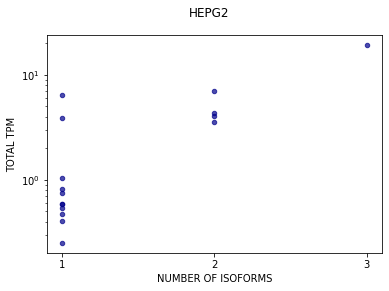

In [30]:
total_tpm_cyp.plot.scatter(x = "NumSplVar", y = "TPM", logy = True, alpha = 0.7, c = 'darkblue')
plt.xticks([1,2,3])
plt.xlabel("NUMBER OF ISOFORMS")
plt.ylabel("TOTAL TPM")
plt.suptitle('HEPG2')
# plt.savefig('HepG2_SplVarСyp.png')

In [31]:
len(total_tpm_cyp[total_tpm_cyp.NumSplVar == 1])

11

In [32]:
total_tpm_cyp.describe()

,Length,EffectiveLength,TPM,NumSplVar,NumReads
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,3488.750000,3145.000000,3.364723,1.375000,8.600625
std,1648.516363,1534.507912,4.771058,0.619139,13.866830
min,1687.000000,1437.000000,0.251095,1.000000,1.000000
25%,2033.000000,1783.000000,0.575241,1.000000,1.176250
50%,3173.500000,2798.500000,0.928598,1.000000,4.000000
75%,4743.000000,4243.000000,4.145482,2.000000,11.000000
max,6943.000000,6193.000000,19.120730,3.000000,57.144000


In [33]:
#total_tpm_cyp.to_excel("sum_cyp_hep.xlsx") 

# Pharmacogenes

In [34]:
pharmgenes = pd.read_excel("Pharmacogenes.xlsx") # The list of pharmacogenes from Chhibber et al., 2017
pharmgenes = pharmgenes.set_index('Gene')

In [35]:
pharmgenes

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCA4,2,ENSG00000198691.6,ABC_Transporter,Y,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB11,5,ENSG00000073734.8,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
VDR,385,ENSG00000111424.6,Nuclear Receptor/Transcription Factor,Y,N,N,N
VKORC1,386,ENSG00000167397.10,Other,Y,N,N,N
XDH,387,ENSG00000158125.5,Other_Metabolism,Y,N,Y,N


## Set the GeneID as index column

In [36]:
prot_idx = total_tpm.set_index('GeneID')
prot_idx

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
A1CF,11611,11111.0,9.084799,2,28.000
A2M,5467,4967.0,277.212266,2,1458.743
A4GALT,1956,1706.0,0.506016,1,1.000
AAAS,2812,2312.0,10.385680,2,16.344
AACS,3256,3006.0,2.545470,1,8.864
...,...,...,...,...,...
ZWINT,5164,4414.0,6.160817,3,10.278
ZXDB,5894,5644.0,1.376571,1,9.000
ZYG11B,10437,9937.0,0.641081,2,3.000


## Search for pharmacogenes in the hep 5

In [37]:
pharmgenes_hep = prot_idx[prot_idx.index.isin(pharmgenes.index)]
pharmgenes_hep

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
ABCA1,10408,10158.0,0.594885,1,7.000
ABCB1,9302,8802.0,0.475881,2,2.420
ABCB10,3869,3619.0,4.293655,1,18.000
ABCB4,3961,3711.0,1.395737,1,6.000
ABCB6,2878,2628.0,3.848542,1,11.716
...,...,...,...,...,...
UGT2B11,2105,1855.0,0.465371,1,1.000
UGT2B4,1836,1586.0,1.088604,1,2.000
UGT2B7,5919,4919.0,22.610431,4,36.001


## There is 198 pharmacogenes found in hep 1

In [38]:
#pharmgenes_hep.to_excel("Pharmacogenes_d1.xlsx") 

## Sort by TPM to get the top-expressed pharmacogenes

In [39]:
pharmgenes_hep.sort_values(by = ['TPM'], ascending = False).head(50)

,Length,EffectiveLength,TPM,NumSplVar,NumReads
GeneID,,,,,
APOA2,2974,1236.222,12818.167289,7,3065.607
RPL13,9681,8431.000,4061.623540,5,2369.536
ALB,11963,10213.000,3962.604957,7,7033.311
APOA1,5114,3864.000,1817.734083,5,1450.301
SERPINA1,17987,16237.000,787.036843,7,1356.246
NQO1,8860,7360.000,673.385790,6,771.541
APOE,2767,2017.000,655.338277,3,673.221
ORM1,802,552.000,378.850502,1,242.250
ORM2,764,514.000,286.899644,1,170.824


In [40]:
phgt = pharmgenes[pharmgenes.index.isin(pharmgenes_hep.index)]
phgt

,Number,Ensembl Gene ID,Category,Drug Target,GPCR as Drug Target,Enzyme as as Drug Target,Ion Channel as Drug Target
Gene,,,,,,,
ABCA1,1,ENSG00000165029.11,ABC_Transporter,N,N,N,N
ABCB1,3,ENSG00000085563.8,ABC_Transporter,Y,N,N,N
ABCB10,4,ENSG00000135776.4,ABC_Transporter,N,N,N,N
ABCB4,6,ENSG00000005471.11,ABC_Transporter,N,N,N,N
ABCB6,8,ENSG00000115657.7,ABC_Transporter,N,N,N,N
...,...,...,...,...,...,...,...
UGT2B11,378,ENSG00000213759.4,UGT_Metabolism,N,N,N,N
UGT2B4,382,ENSG00000156096.8,UGT_Metabolism,N,N,N,N
UGT2B7,383,ENSG00000171234.9,UGT_Metabolism,N,N,N,N


## Quantification

In [41]:
len(phgt['Category'].unique())

14

In [42]:
print('ABC_Transporter:', len(phgt[phgt['Category'].str.contains(r'ABC_Transporter')]))
print('Other:', len(phgt[phgt['Category'].str.contains(r'Other')]))
print('ADH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ADH_Metabolism')]))
print('Receptor:', len(phgt[phgt['Category'].str.contains(r'Receptor')]))
print('Nuclear Receptor/Transcription Factor:', len(phgt[phgt['Category'].str.contains(r'Nuclear Receptor/Transcription Factor')]))
print('ALDH_Metabolism:', len(phgt[phgt['Category'].str.contains(r'ALDH_Metabolism')]))
print('Other_Metabolism:', len(phgt[phgt['Category'].str.contains(r'Other_Metabolism')]))
print('Other_Transporter:', len(phgt[phgt['Category'].str.contains(r'Other_Transporter')]))
print('CYP_Metabolism:', len(phgt[phgt['Category'].str.contains(r'CYP_Metabolism')]))
print('GST_Metabolism:', len(phgt[phgt['Category'].str.contains(r'GST_Metabolism')]))
print('Channel:', len(phgt[phgt['Category'].str.contains(r'Channel')]))
print('SLC_Transporter:', len(phgt[phgt['Category'].str.contains(r'SLC_Transporter')]))
print('SULT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'SULT_Metabolism')]))
print('UGT_Metabolism:', len(phgt[phgt['Category'].str.contains(r'UGT_Metabolism')]))

ABC_Transporter: 15
Other: 91
ADH_Metabolism: 3
Receptor: 25
Nuclear Receptor/Transcription Factor: 19
ALDH_Metabolism: 6
Other_Metabolism: 36
Other_Transporter: 4
CYP_Metabolism: 15
GST_Metabolism: 9
Channel: 2
SLC_Transporter: 19
SULT_Metabolism: 7
UGT_Metabolism: 6
